In [406]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [407]:
df_train = pd.read_csv('./Data/train.csv')
df_test = pd.read_csv('./Data/test.csv')

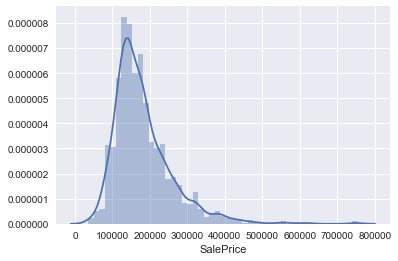

In [408]:
sns.distplot(df_train['SalePrice'])

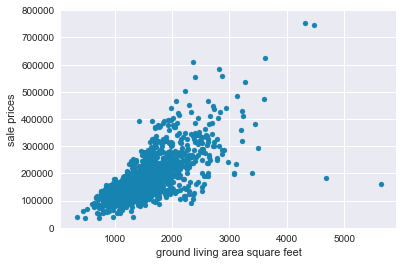

In [409]:
# scatter plot of sale prices based on ground living area square feet
plt.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'],s = 25, c = ['#1783B1'])
plt.ylim(0, 800000)
plt.xlabel('ground living area square feet')
plt.ylabel('sale prices')

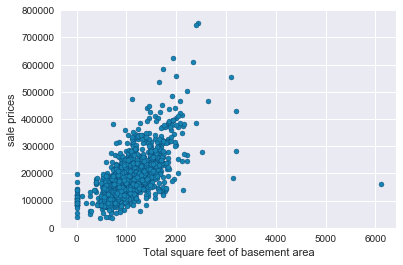

In [410]:
# scatter plot of sale prices based on Total square feet of basement area
plt.scatter(x = df_train['TotalBsmtSF'], y = df_train['SalePrice'],s = 25, c = ['#1783B1'], edgecolors = ['#042D5B'])
plt.ylim(0, 800000)
plt.xlabel('Total square feet of basement area')
plt.ylabel('sale prices')

(-0.5, 9.5, 0, 800000)

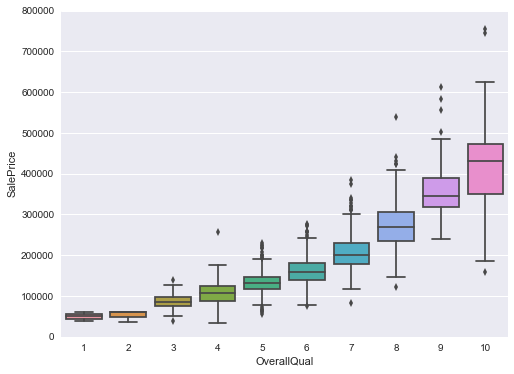

In [411]:
# box plot of sale prices based on overall qual
variable = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[variable]], axis = 1)
f, ax = plt.subplots(figsize = (8, 6))
fig = sns.boxplot(x = variable, y = 'SalePrice', data = data)
fig.axis(ymin = 0, ymax = 800000)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

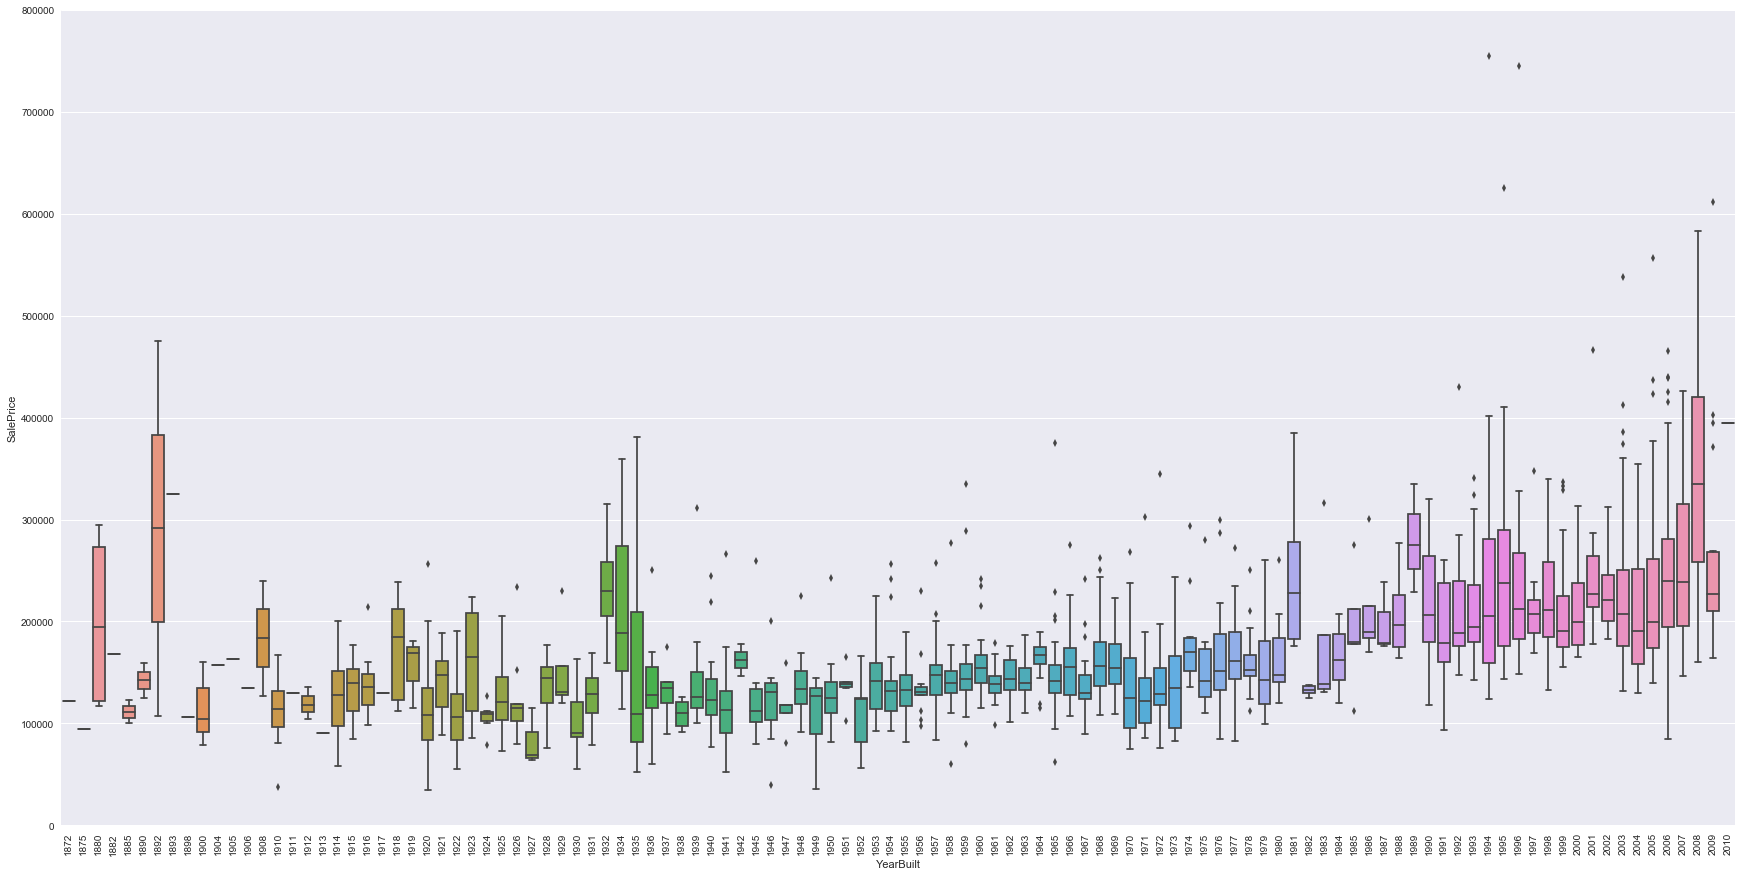

In [412]:
# box plot of sale prices based on year of build
variable = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[variable]], axis = 1)
fig, ax = plt.subplots(figsize = (30, 15))
fig = sns.boxplot(x = variable, y = 'SalePrice', data = data)
fig.axis(ymin = 0, ymax = 800000)
plt.xticks(rotation = 90)

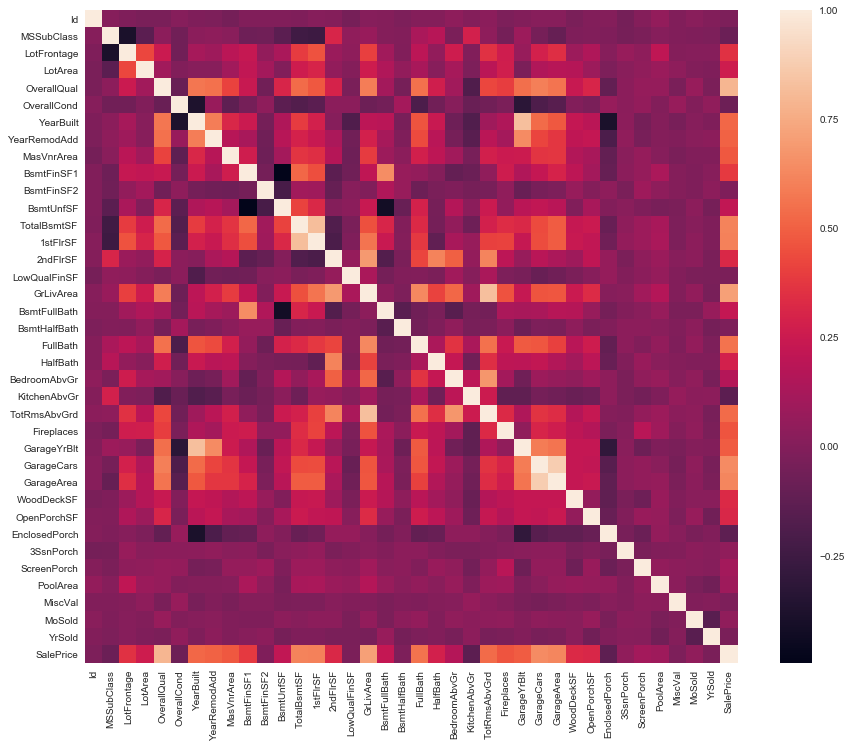

In [413]:
corrmat = df_train.corr()
fig, axis = plt.subplots(figsize = (15, 12))
sns.heatmap(corrmat, square = True)

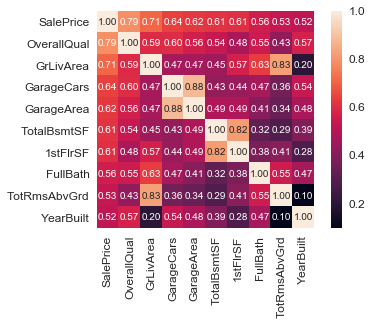

In [414]:
columns = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[columns].values.T)
sns.set(font_scale = 1.2)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10},
                 yticklabels = columns.values, xticklabels = columns.values)
plt.show()

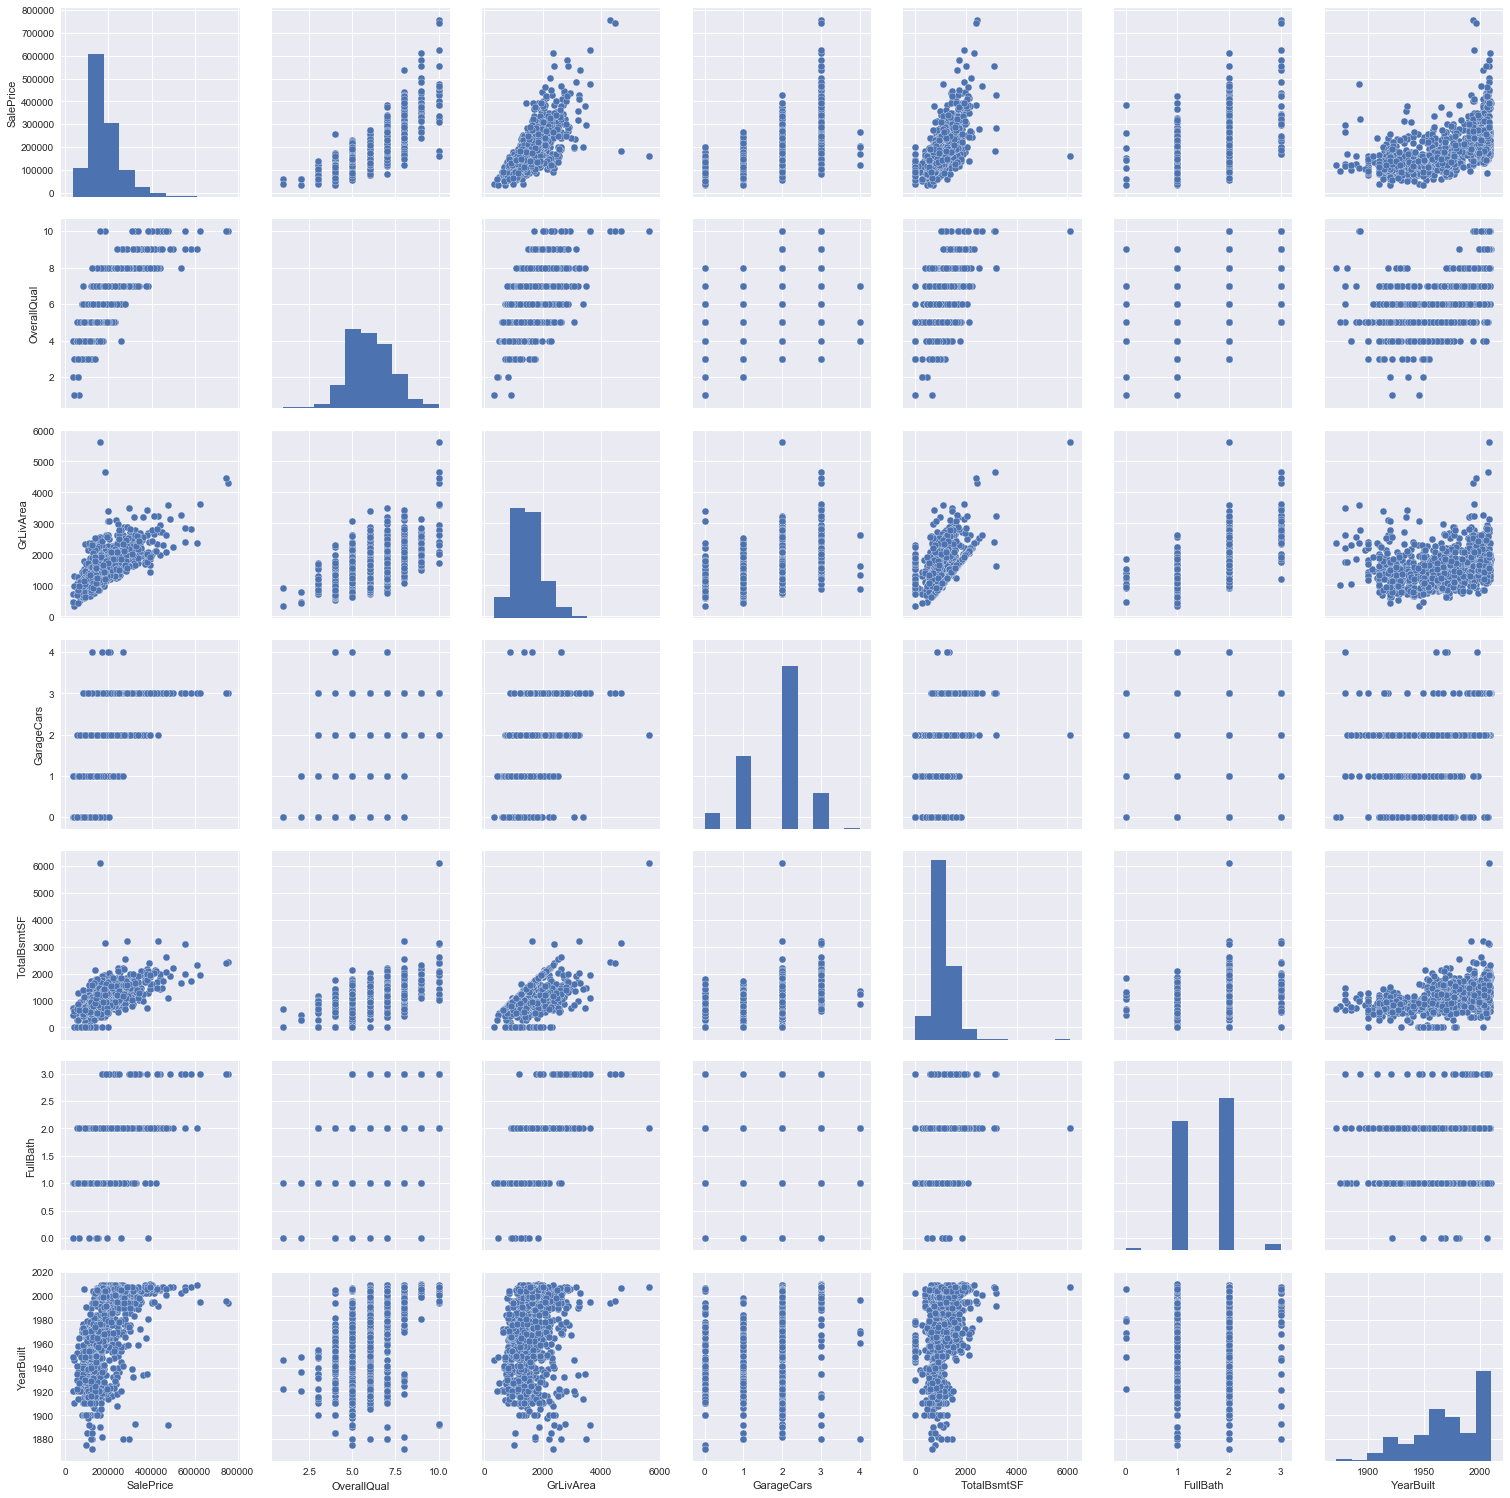

In [415]:
sns.set()
columns = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[columns], size = 3)
plt.show()

In [416]:
# searching for missing data
total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [417]:
# cleaning missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index, 1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max()

0

In [418]:
total = df_test.isnull().sum().sort_values(ascending = False)
percent = (df_test.isnull().sum() / df_test.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


In [419]:
df_test = df_test.drop((missing_data[missing_data['Total'] > 1]).index, 1)
column_list = ['MSZoning', 'BsmtHalfBath', 'BsmtFullBath', 'Functional', 'Utilities', 'Exterior2nd',
              'KitchenQual', 'GarageCars', 'GarageArea', 'BsmtFinSF1', 'SaleType', 'TotalBsmtSF',
              'BsmtUnfSF', 'BsmtFinSF2', 'Exterior1st']
for column_name in column_list:
    df_test = df_test.drop(df_test.loc[df_test[column_name].isnull()].index)
df_test.isnull().sum().max()

KeyError: 'MSZoning'

In [ ]:
scaled_saleprices = StandardScaler().fit_transform(df_train['SalePrice'].reshape(-1, 1))
sorted_scaled_saleprices = np.sort(scaled_saleprices, kind = 'mergesort', axis = 0)
low_range = sorted_scaled_saleprices[:10]
high_range = sorted_scaled_saleprices[-10:]
print(low_range)
print(high_range)

In [ ]:
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

In [ ]:
sns.distplot(df_train['SalePrice'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot = plt)

In [ ]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])
sns.distplot(df_train['SalePrice'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot = plt)

In [ ]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
sns.distplot(df_train['GrLivArea'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot = plt)

In [ ]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In [ ]:
print(df_train.shape)
print(df_test.shape)

In [ ]:
sale_column = df_train['SalePrice']
df_train = df_train.drop(['SalePrice'], axis = 1)
all_data = pd.concat([df_train, df_test], axis = 0)
all_data = pd.get_dummies(all_data)

In [ ]:
df_train = all_data[:1457]
df_test = all_data[1457:]

In [ ]:
df_train = pd.concat([df_train, sale_column], axis = 1)

In [ ]:
print(df_train.shape)
print(df_test.shape)

In [ ]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

In [ ]:
df_train.to_csv('./Data/cleaned_train_dataset.csv')
df_test.to_csv('./Data/cleaned_test_dataset.csv')